References
- https://github.com/Jordan-Bailey/DSI_Project_4
- https://github.com/jcy10/DSI-Project-4
- https://www.faqgit.com/repositories/Ashisme91/Imbalanced_Classification_of_West_Nile_Virus?id=409246
- https://jovian.ai/ed19s004/west-nile-virus-prediction
- https://github.com/zzeniale/West-Nile-Virus-prediction
- https://github.com/dominiczrong/west-nile-virus-spread-prediction
- https://github.com/haoapple/predict_west_nile_virus
- https://github.com/Zoeychengg/project_4
- https://github.com/saqibnizami/DSI-Project-4 (bad code)
- https://github.com/yufung/Project-4-West-Nile-Virus
- https://github.com/gbkgwyneth/GA-DSI-project-04
- https://github.com/jcy10/DSI-Project-4
- https://github.com/Hao22/GA-Projects/blob/master/P4_West%20Nile%20Virus%20Classification/code/Project4-Part1(EDA).ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('viridis')

In [2]:
import os
import plotly.express as px
import plotly.graph_objects as go
MAPBOX_TOKEN = ''

In [3]:
train = pd.read_csv('./datasets/train.csv')
weather = pd.read_csv('./datasets/weather.csv')
spray = pd.read_csv('./datasets/spray.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [5]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [6]:
train.Date.value_counts().sort_index()

2007-05-29     25
2007-06-05     60
2007-06-26     70
2007-06-29     46
2007-07-02     74
             ... 
2013-08-29    143
2013-09-06    143
2013-09-12    139
2013-09-19    112
2013-09-26     92
Name: Date, Length: 95, dtype: int64

In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [8]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


We have weather data from 2007 to 2014.

In [9]:
weather.Date.value_counts().sort_index()

2007-05-01    2
2007-05-02    2
2007-05-03    2
2007-05-04    2
2007-05-05    2
             ..
2014-10-27    2
2014-10-28    2
2014-10-29    2
2014-10-30    2
2014-10-31    2
Name: Date, Length: 1472, dtype: int64

In [10]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [11]:
spray[spray.isnull().any(axis=1)].Date

1030    2011-09-07
1031    2011-09-07
1032    2011-09-07
1033    2011-09-07
1034    2011-09-07
           ...    
1609    2011-09-07
1610    2011-09-07
1611    2011-09-07
1612    2011-09-07
1613    2011-09-07
Name: Date, Length: 584, dtype: object

Spray only happens in 2011 and 2013.

In [12]:
spray.Date.value_counts().sort_index()

2011-08-29      95
2011-09-07    2114
2013-07-17    2202
2013-07-25    1607
2013-08-08    1195
2013-08-15    2668
2013-08-16     141
2013-08-22    1587
2013-08-29    2302
2013-09-05     924
Name: Date, dtype: int64

In [13]:
train.WnvPresent.value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

This is an imbalanced dataset, most cases do not have West Nile Virus. Will explore where it is present.

In [14]:
# #need to sign up for mapbox here.
# px.set_mapbox_access_token(MAPBOX_TOKEN)
# fig = px.scatter_mapbox(train, lat = 'Latitude', lon  = 'Longitude',
#                         size_max=15, zoom = 10)

# fig.update_layout(title = 'Traps',
#     autosize=False,
#     width=500,
#     height=700,)

# fig.show()

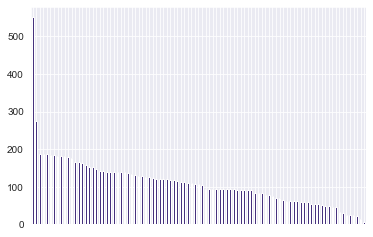

In [15]:
pd.value_counts(train['Date'].values, sort=True).plot.bar()
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 

In [16]:
train.Species.value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [17]:
species = {'CULEX TERRITANS': 'OTHERS', 
                   'CULEX SALINARIUS': 'OTHERS',
                   'CULEX TARSALIS': 'OTHERS',
                   'CULEX ERRATICUS': 'OTHERS'}

In [20]:
train.Species.map(lambda x: species[x] if x in species else x)

0        CULEX PIPIENS/RESTUANS
1                CULEX RESTUANS
2                CULEX RESTUANS
3        CULEX PIPIENS/RESTUANS
4                CULEX RESTUANS
                  ...          
10501    CULEX PIPIENS/RESTUANS
10502    CULEX PIPIENS/RESTUANS
10503    CULEX PIPIENS/RESTUANS
10504    CULEX PIPIENS/RESTUANS
10505    CULEX PIPIENS/RESTUANS
Name: Species, Length: 10506, dtype: object

In [21]:
train.Species.value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64